<a href="https://colab.research.google.com/github/rzqmhb/PCVK_Ganjil_2023/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import os
from google.colab import drive
from IPython.utils.path import glob
import numpy as np

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


156.0 (680, 1055)


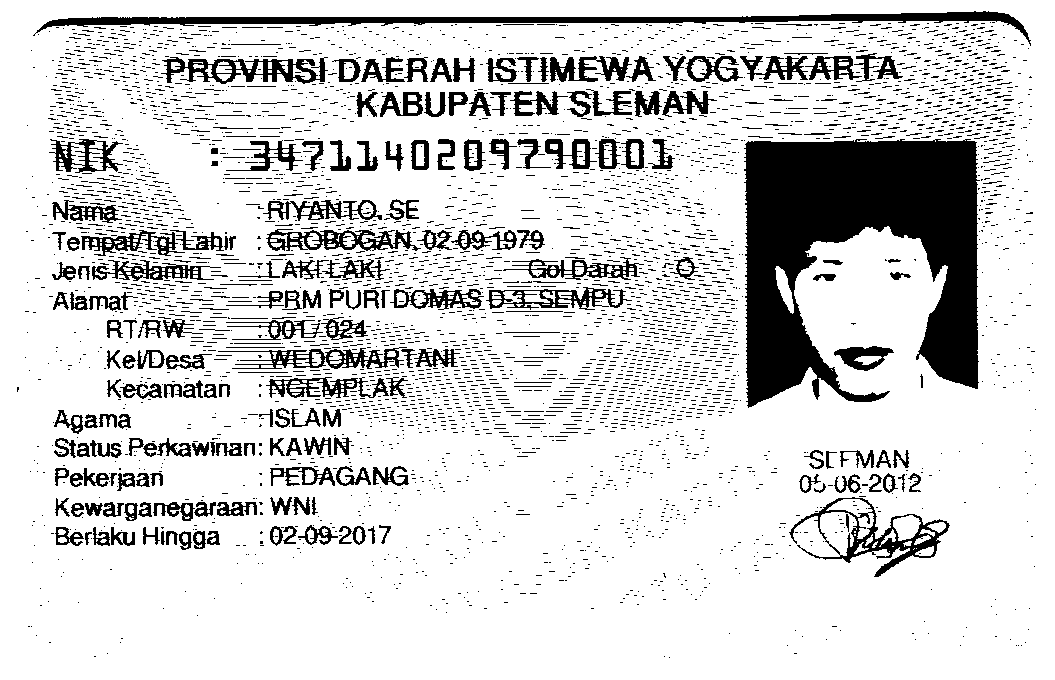

None


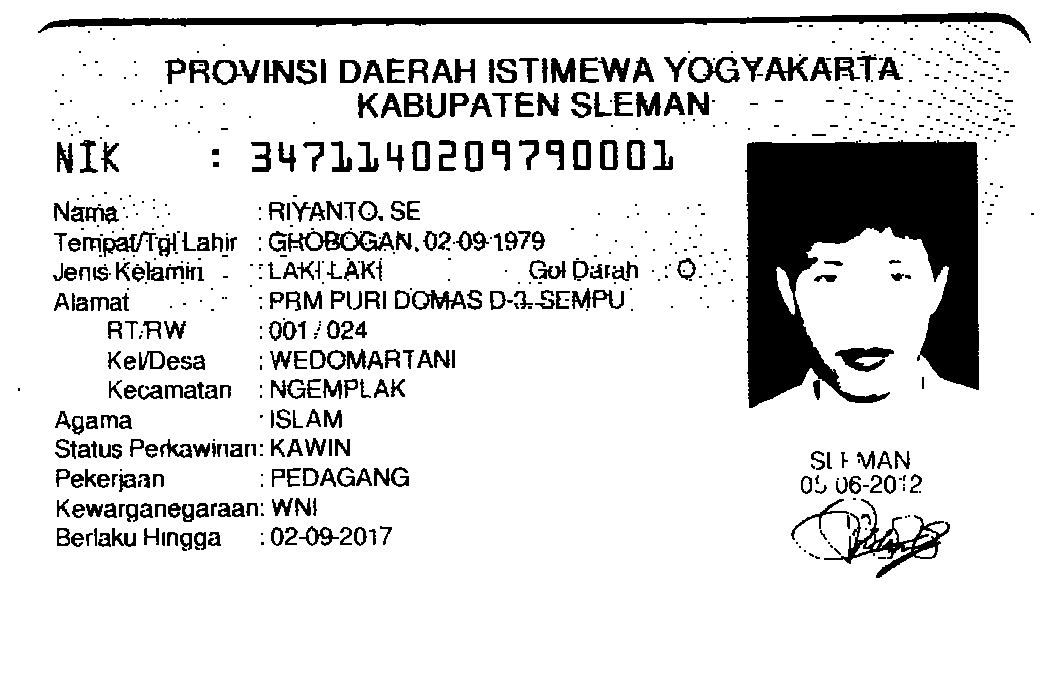

None


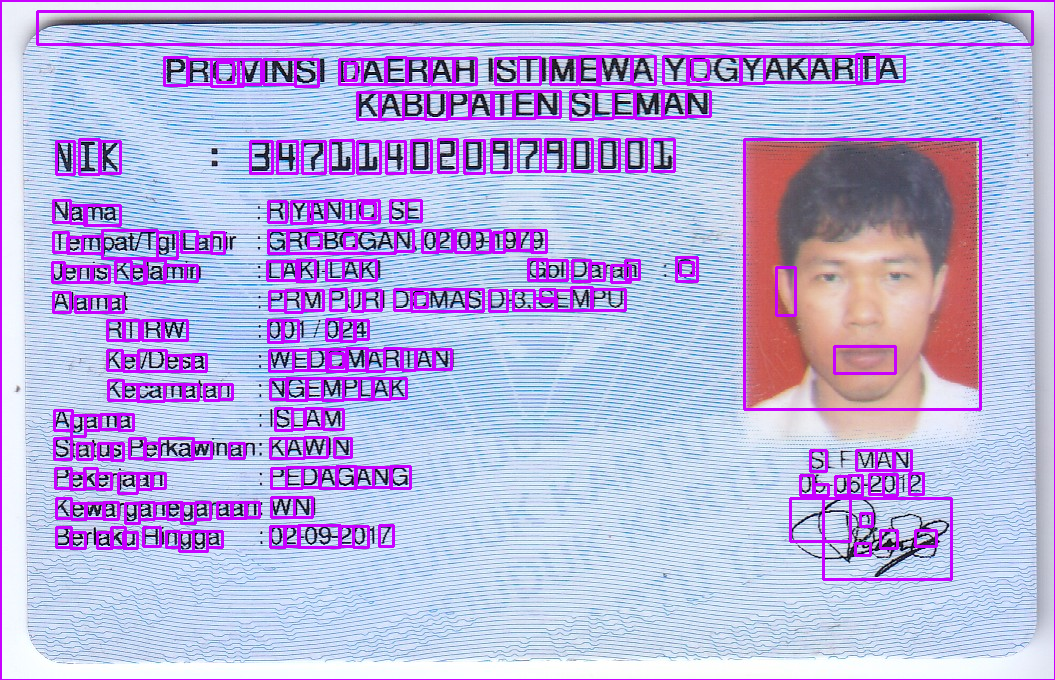

None
88.0 (338, 600)


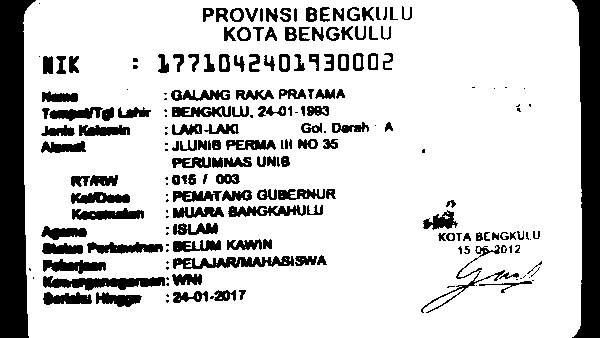

None


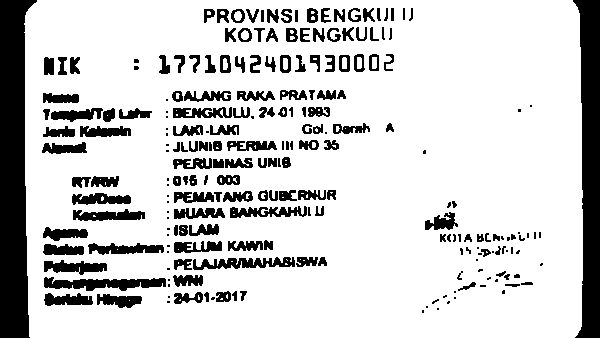

None


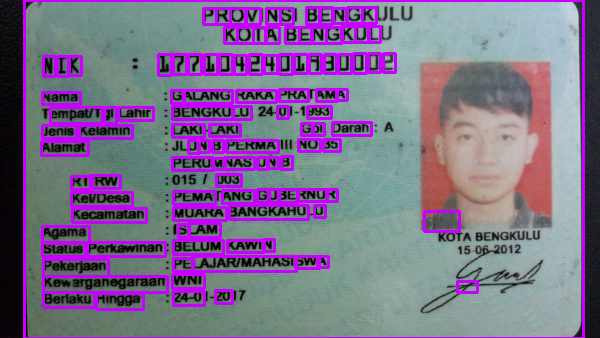

None
144.0 (707, 1070)


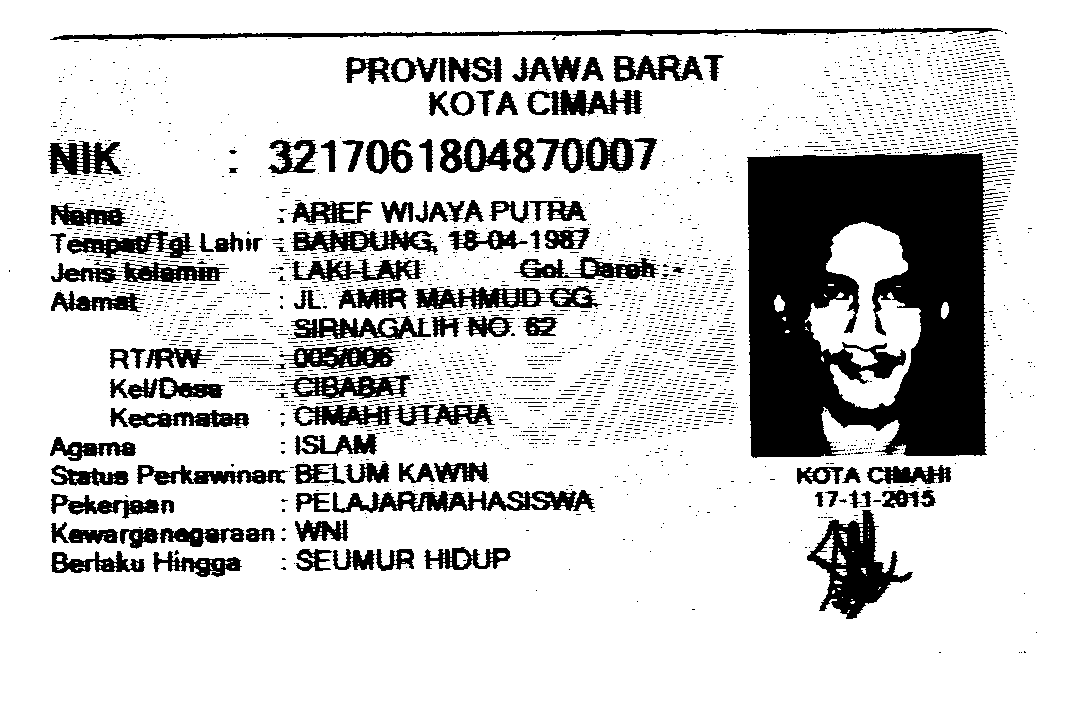

None


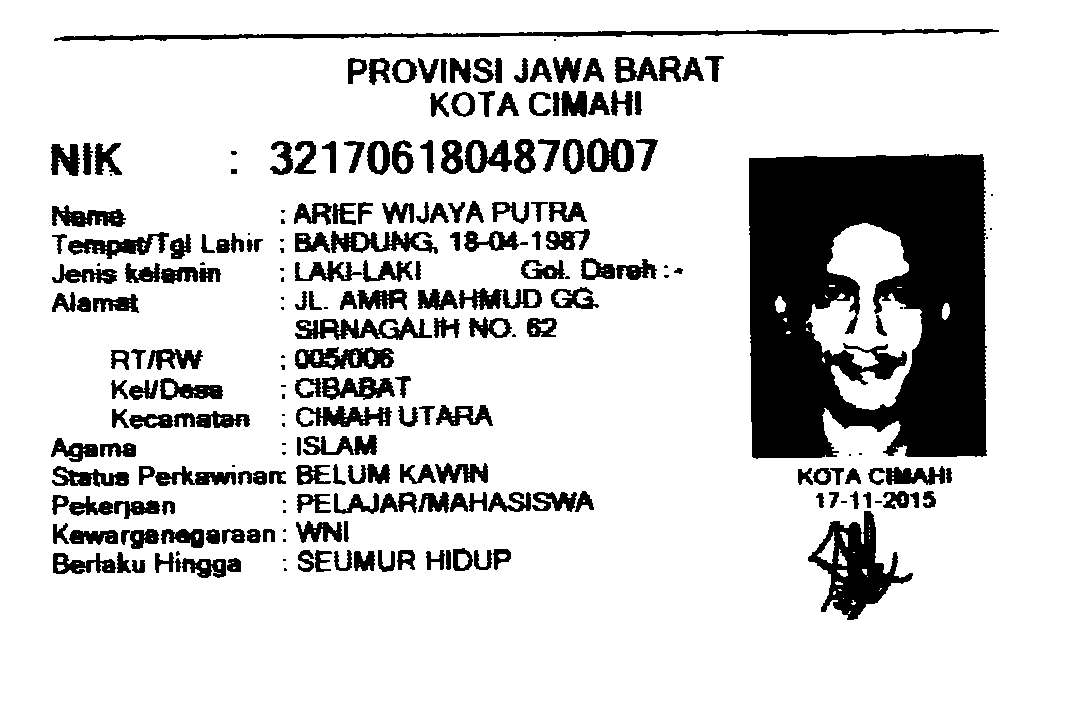

None


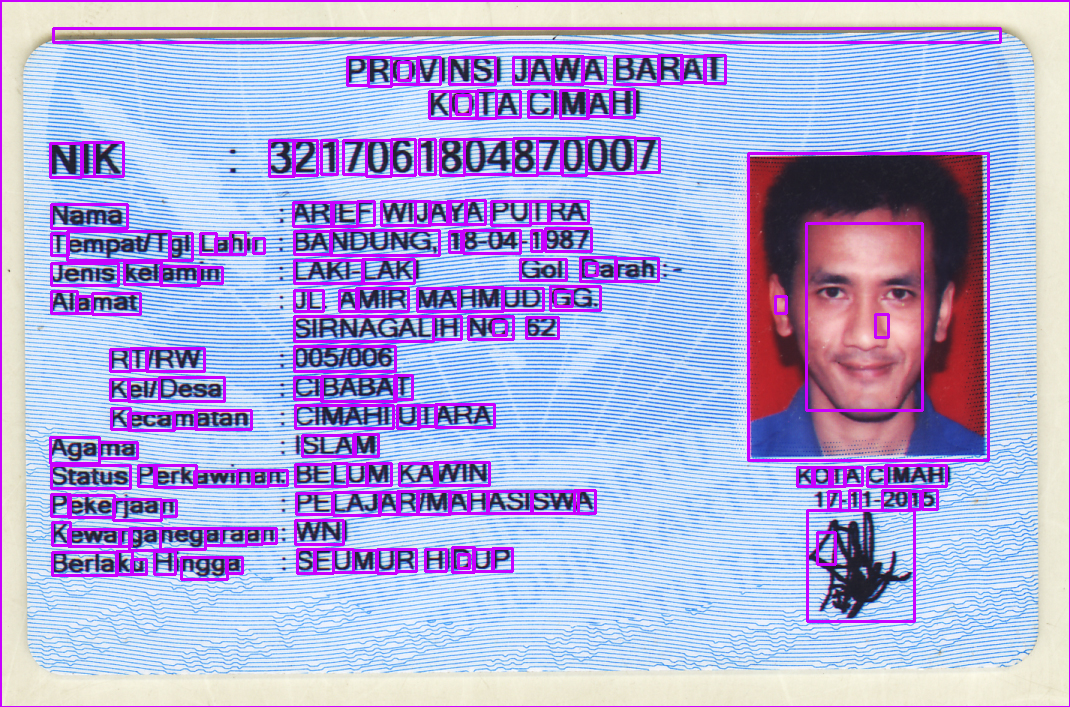

None
168.0 (300, 493)


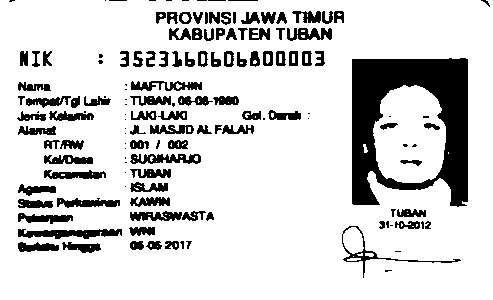

None


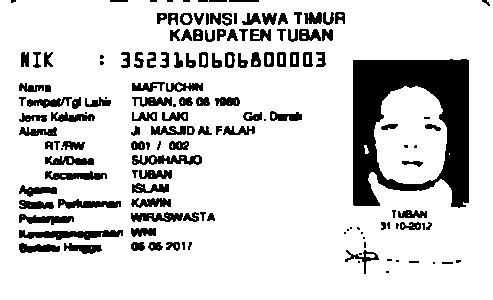

None


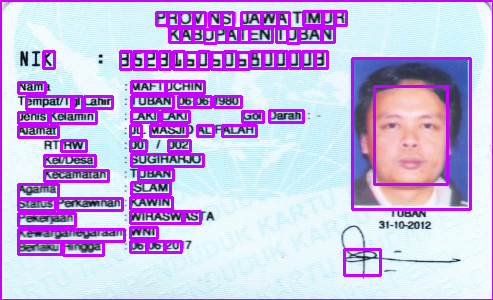

None
168.0 (300, 493)


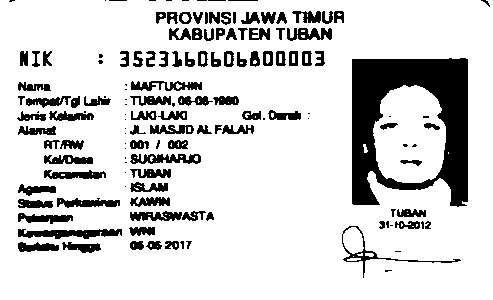

None


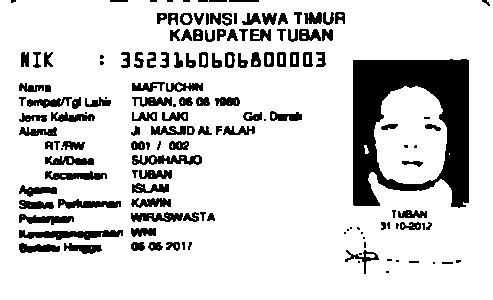

None


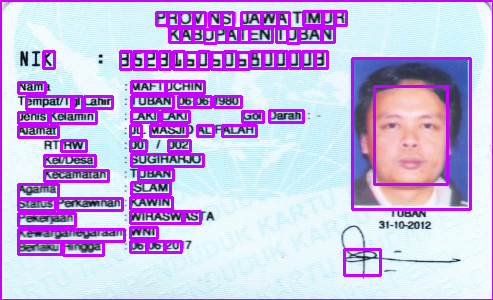

None
140.0 (381, 608)


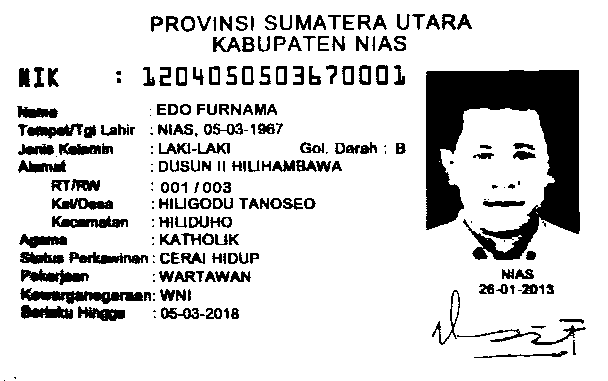

None


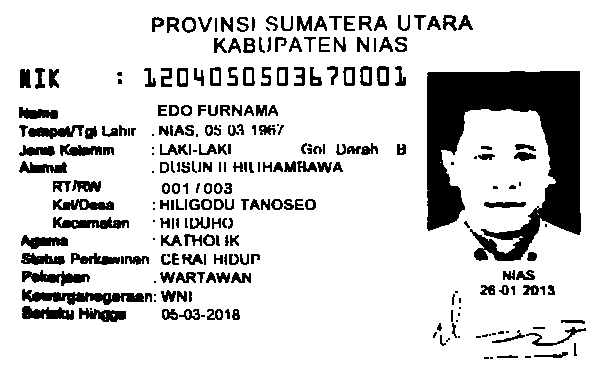

None


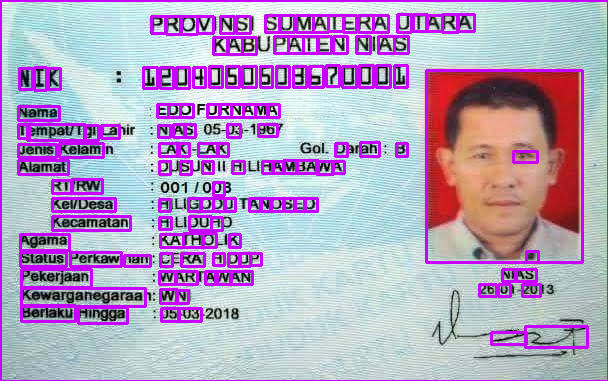

None
160.0 (636, 996)


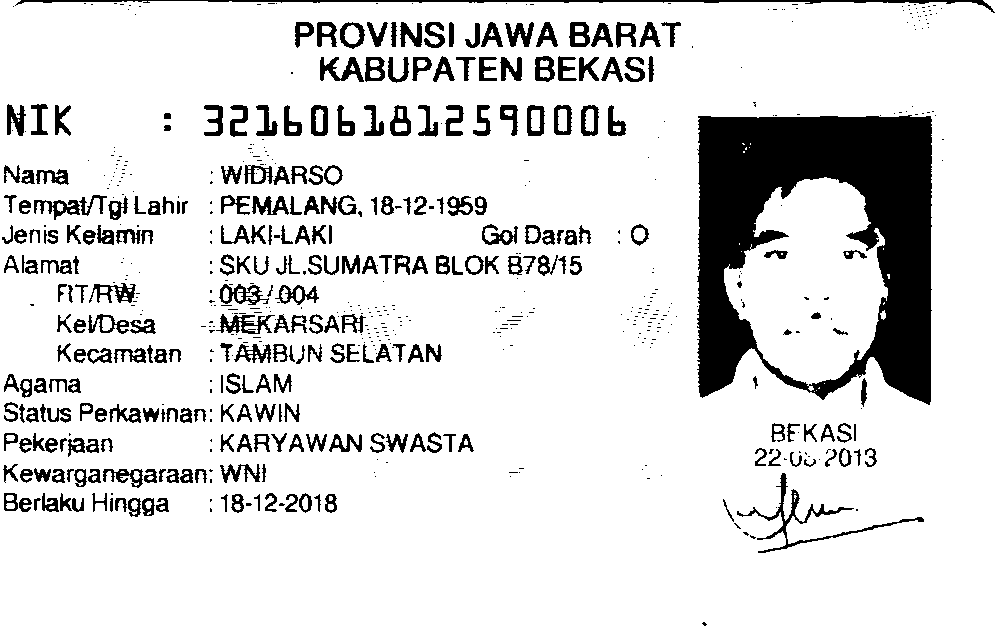

None


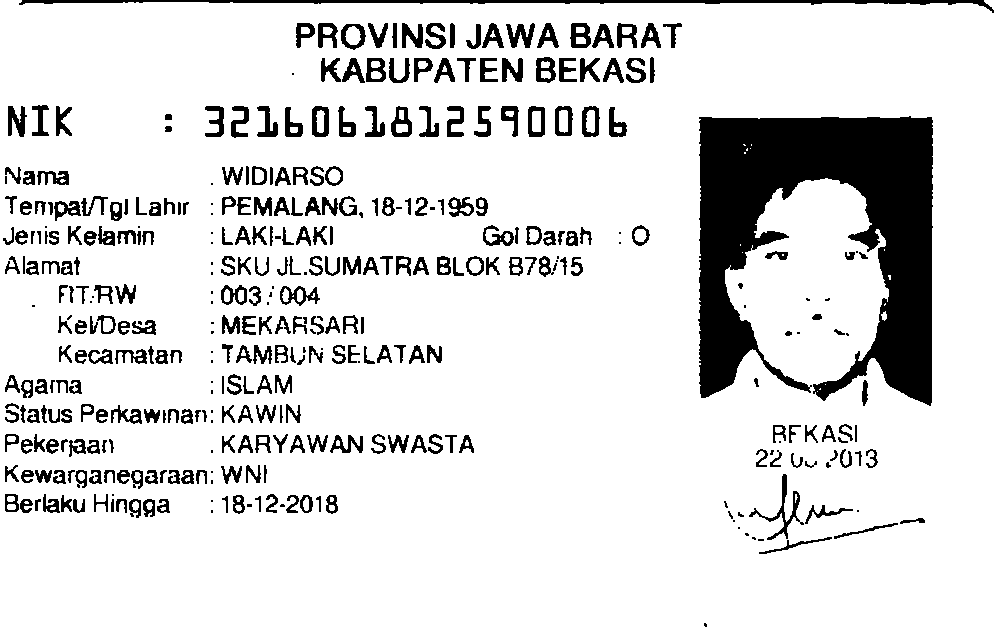

None


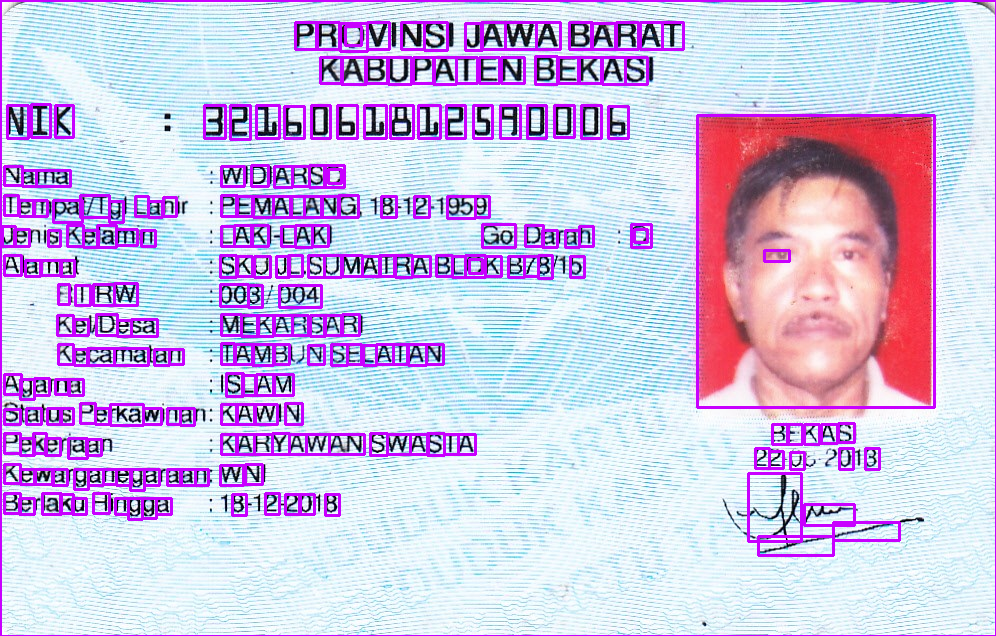

None
141.0 (488, 800)


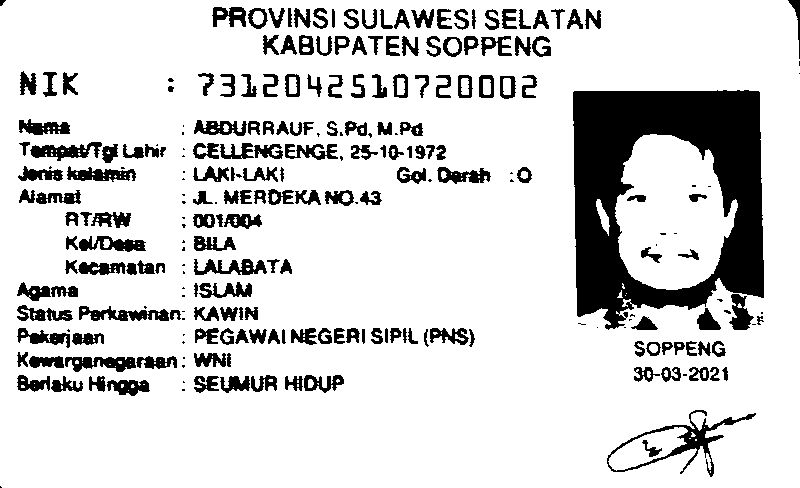

None


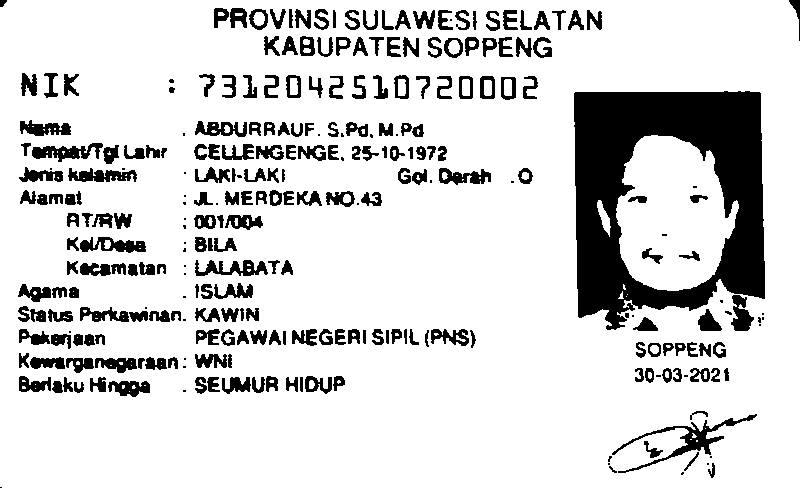

None


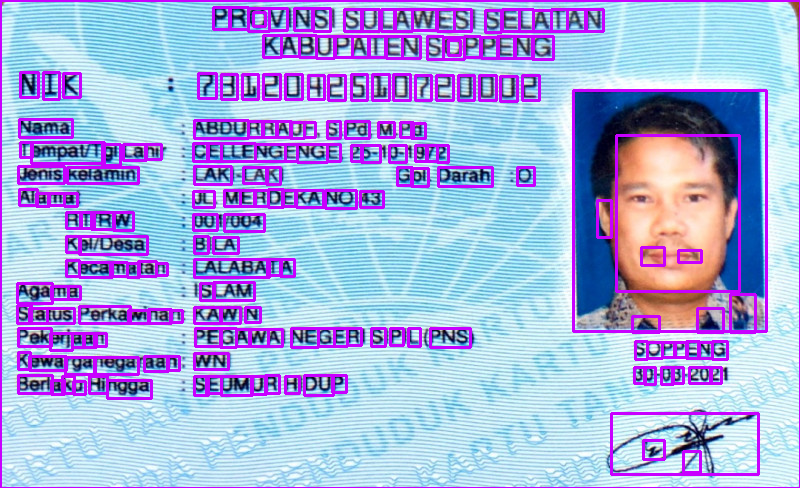

None


In [43]:
for img in glob.glob('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/ktp/*.png'):
  src = cv2.imread(img)

  # Filtering
  blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

  # Ubah ke grayscale
  gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

  #binerisasi
  ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  print(ret, bw.shape)
  print(cv2_imshow(bw))

  kernel = np.ones((2,2),np.uint8)
  open = cv2.morphologyEx(bw,cv2.MORPH_CLOSE, kernel)
  print(cv2_imshow(open))

  contours, hierarchy = cv2.findContours(open, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
  # cv2.drawContours(src, contours, 3, (0,255,0), 3)
  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if((w > 10) and (h > 10)):
      cv2.rectangle(src, (x, y), (x+w, y+h), (255, 0, 200), 2)

  print(cv2_imshow(src))